In [1]:
import tensorflow as tf 
print(tf.__version__)

2.4.1


In [14]:
from tensorflow.keras.layers import Layer,Lambda,Flatten,Conv2D,Dense
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

#### Resize the image to this 

In [15]:
IMAGE_SIZE=[224, 224]

train_path="Dataset/Train"
valid_path="Dataset/Test"

### Initiate the VGG19 transfer learning algo with weights of imagenet
##### Adding the input layer


In [16]:
vgg19=VGG19(input_shape=IMAGE_SIZE+[3],weights="imagenet",include_top=False)

In [17]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### Do not train the trainable weigths

In [18]:
for layer in vgg19.layers:
    layer.trainable=False

### Finding the output classes 

In [19]:
folder=glob("Dataset/Train/*")

In [20]:
folder

['Dataset/Train/Parasite', 'Dataset/Train/Uninfected']

##### In the modified VGG19 last layer, we will then flatten the layer then add a dense layer then output

In [21]:
x=Flatten()(vgg19.output)
prediction=Dense(len(folder),activation="softmax")(x)
model=Model(inputs=vgg19.input,outputs=prediction)

In [22]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

#### Compilation

In [30]:
model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer="adam")

#### Use ImageDataGenerator to load the images from the dataset

##### Step 1 Data Augmentation


In [24]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=.2,zoom_range=.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

##### Step 2 loading the images 

In [26]:
training_set=train_datagen.flow_from_directory("Dataset/Train",batch_size=32,class_mode="categorical",
                                              target_size=(224,224))

Found 416 images belonging to 2 classes.


In [28]:
test_set=test_datagen.flow_from_directory("Dataset/Test",target_size=(224,224),batch_size=32,
                                          class_mode="categorical")

Found 134 images belonging to 2 classes.


### Fitting the model

In [31]:
tranfer_vgg19=model.fit(training_set,validation_data=test_set,epochs=2,steps_per_epoch=len(training_set),
                        validation_steps=len(test_set))

Epoch 1/2
13/13 [==============================] - 697s 55s/step - loss: 1.3264 - accuracy: 0.5673 - val_loss: 0.5879 - val_accuracy: 0.6866
Epoch 2/2
13/13 [==============================] - 535s 42s/step - loss: 0.5910 - accuracy: 0.6736 - val_loss: 0.5212 - val_accuracy: 0.7239


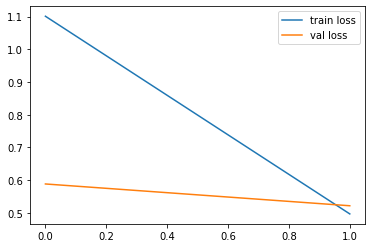

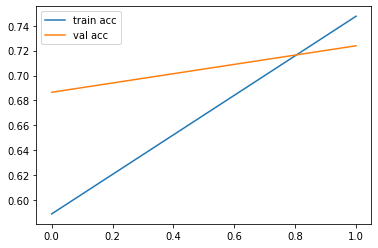

<Figure size 432x288 with 0 Axes>

In [32]:
# plot the loss
plt.plot(tranfer_vgg19.history['loss'], label='train loss')
plt.plot(tranfer_vgg19.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(tranfer_vgg19.history['accuracy'], label='train acc')
plt.plot(tranfer_vgg19.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')